### 1. Project Introduction

### Liver Patient Prediction Project

This project aims to predict whether a patient is likely to have a liver disease based on clinical attributes. The dataset contains medical records of patients, including bilirubin levels, enzyme counts, and protein ratios.

We'll follow a structured data science workflow:
1. Data Loading & Cleaning
2. Exploratory Data Analysis (EDA)
3. Model Building & Evaluation
4. Feature Importance


### 2. Import Libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


### 3. Load DataSet 

In [165]:
df = pd.read_excel("Indian_Liver_patient_DataSet.xlsx")

In [166]:
df.head()

,Age,Gender,TotalBilirubin,DirectBilirubin,AlkalinePhosphotase,AlamineAminotransferase,AspartateAminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [167]:
df.tail()

,Age,Gender,TotalBilirubin,DirectBilirubin,AlkalinePhosphotase,AlamineAminotransferase,AspartateAminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,Target
565,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
566,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
569,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        570 non-null    int64  
 1   Gender                     570 non-null    object 
 2    TotalBilirubin            570 non-null    float64
 3   DirectBilirubin            570 non-null    float64
 4   AlkalinePhosphotase        570 non-null    int64  
 5    AlamineAminotransferase   570 non-null    int64  
 6   AspartateAminotransferase  570 non-null    int64  
 7   TotalProtiens              570 non-null    float64
 8    Albumin                   570 non-null    float64
 9   AlbuminandGlobulinRatio    566 non-null    float64
 10  Target                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 49.1+ KB


In [169]:
df.describe()

,Age,TotalBilirubin,DirectBilirubin,AlkalinePhosphotase,AlamineAminotransferase,AspartateAminotransferase,TotalProtiens,Albumin,AlbuminandGlobulinRatio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### 4. Data Cleaning

In [171]:
# Rename Column names for clarity

df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
              'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins',
              'Albumin', 'Albumin_and_Globulin_Ratio', 'Target']

In [172]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [173]:
# Checking for missing values 

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [174]:
df.Albumin_and_Globulin_Ratio.median()

0.95

In [175]:
# Filling missing values with median

df['Albumin_and_Globulin_Ratio'] = df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.median())

In [176]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [177]:
# Encoding Gender Column

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [178]:
# Convert Target: 1 = Liver Disease, 2 = No Disease → 1 = Yes, 0 = No

df['Target'] = df['Target'].apply(lambda x: 1 if x == 1 else 0)


### 5. Exploratory Data Analysis (EDA)

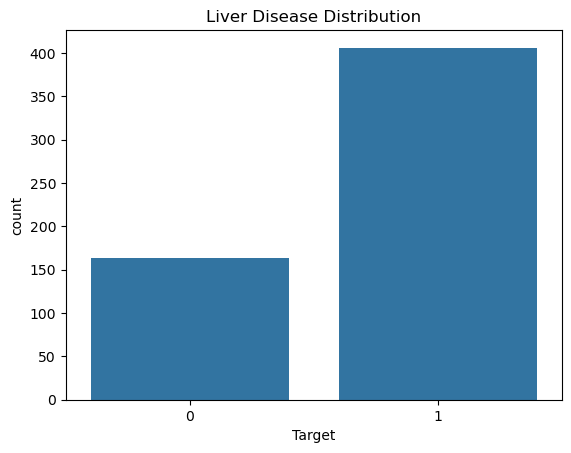

In [180]:
# Class distribution

sns.countplot(x='Target', data=df)
plt.title("Liver Disease Distribution")
plt.show()

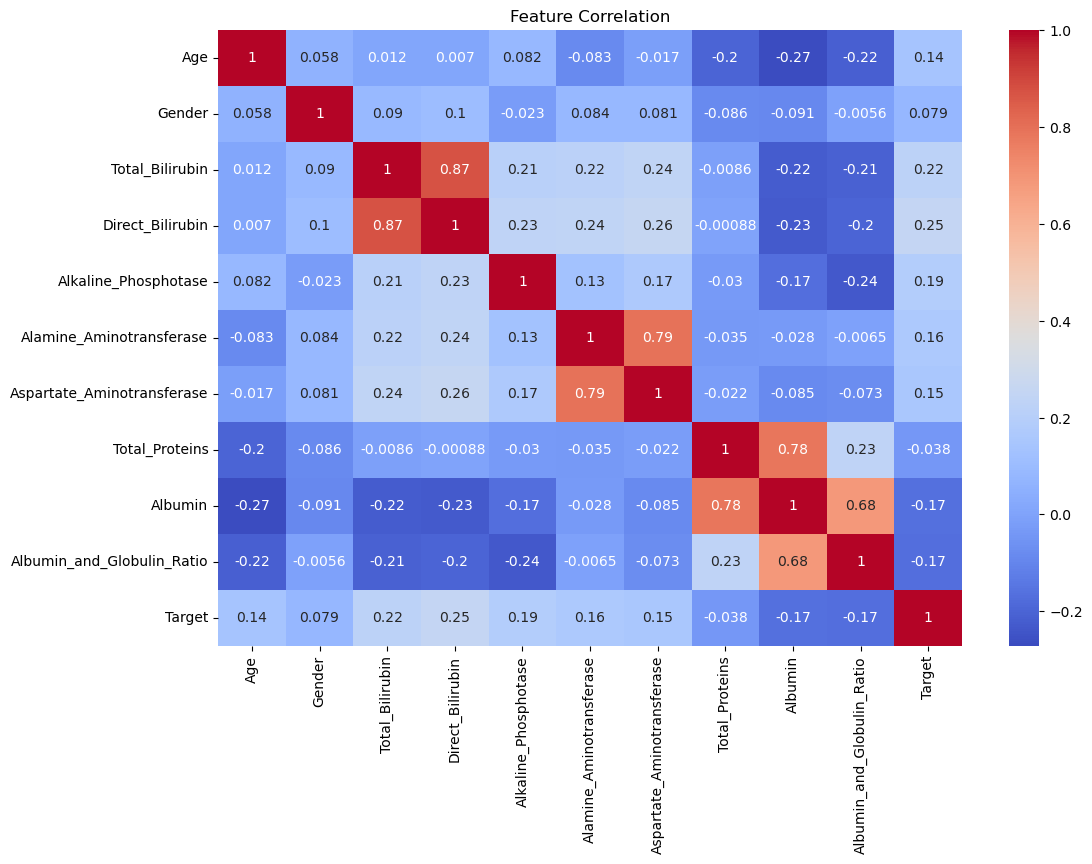

In [181]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

### 6. Feature Scaling & Train-Test Split

In [183]:
X = df.drop('Target', axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 7. Model Training – Logistic Regression & Random Forest

In [185]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [186]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### 8. Model Evaluation

In [188]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.39      0.24      0.30        29
           1       0.77      0.87      0.82        85

    accuracy                           0.71       114
   macro avg       0.58      0.56      0.56       114
weighted avg       0.67      0.71      0.69       114



In [189]:
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        29
           1       0.81      0.88      0.84        85

    accuracy                           0.75       114
   macro avg       0.67      0.63      0.64       114
weighted avg       0.73      0.75      0.74       114



### Model Training after applying SMOTE to training data

In [191]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [192]:
# New class distribution

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_resampled))


Before SMOTE: [135 321]
After SMOTE: [321 321]


In [193]:
# Logistic Regression
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)


In [194]:
# Random Forest Classifier 

rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

### Model Evaluation 

In [196]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.35      0.76      0.48        29
           1       0.87      0.53      0.66        85

    accuracy                           0.59       114
   macro avg       0.61      0.64      0.57       114
weighted avg       0.74      0.59      0.61       114



In [197]:
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.47      0.62      0.54        29
           1       0.86      0.76      0.81        85

    accuracy                           0.73       114
   macro avg       0.66      0.69      0.67       114
weighted avg       0.76      0.73      0.74       114



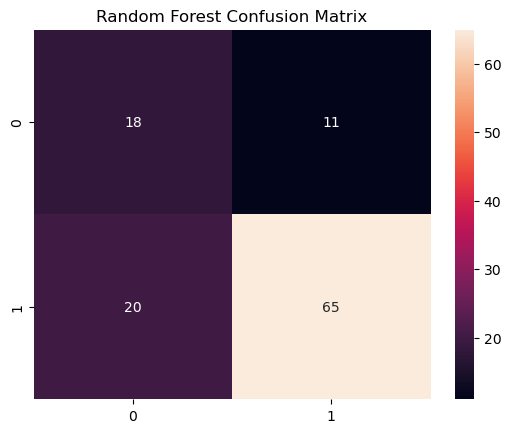

In [198]:
# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [199]:
# ROC-AUC

print("ROC-AUC (Random Forest):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

ROC-AUC (Random Forest): 0.7068965517241379


In [273]:
# ROC-AUC

print("ROC-AUC (Logistic Regression):", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

ROC-AUC (Logistic Regression): 0.7350912778904665


### 9. Feature Importance 

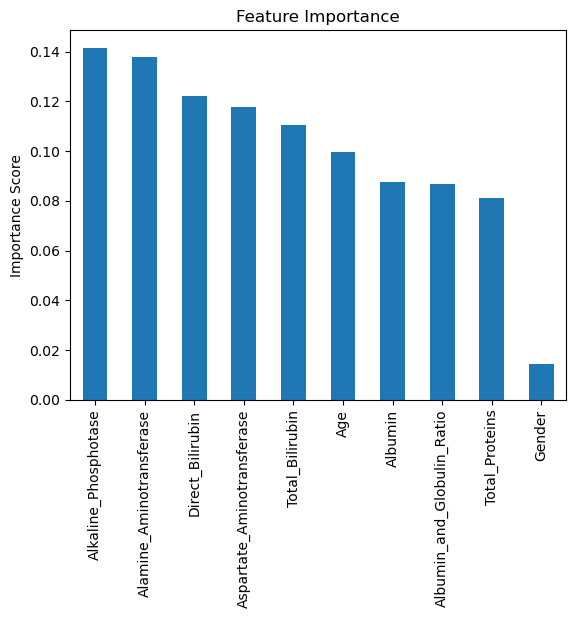

In [201]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()


In [258]:
# ROC-AUC post applying SMOTE

print("ROC-AUC (Random Forest):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

ROC-AUC (Random Forest): 0.7068965517241379


In [252]:
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [254]:
roc_auc = roc_auc_score(y_test, y_proba_rf)

In [256]:
print("ROC-AUC (Random Forest):", roc_auc)

ROC-AUC (Random Forest): 0.7068965517241379


### Model Training – XGBoost

In [261]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 1.9 MB/s eta 0:00:31
    --------------------------------------- 1.0/56.8 MB 2.0 MB/s eta 0:00:28
    --------------------------------------- 1.3/56.8 MB 1.8 MB/s eta 0:00:31
    --------------------------------------- 1.3/56.8 MB 1.8 MB/s eta 0:00:31
   - -------------------------------------- 1.6/56.8 MB 1.3 MB/s eta 0:00:42
   - -------------------------------------- 2.1/56.8 MB 1.5 MB/s eta 0:00:36
   - -------------------------------------- 2.6/56.8 MB 1.6 MB/s eta 0:00:35
   -- ------------------------------------- 2.9/56.8 MB 1.7 MB/s eta 0:00:32
   -- ------------------------------------- 3.1/56.8 MB 1.6 MB/s eta 0:00:34
   -- ------------------------------------- 3.1/56.8 MB 1.6 MB/s eta 0:00:34
   -- ------------------------------------- 3.7/56.8 MB 1.5 MB/s eta 0:00:36
   -- -------

In [263]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [265]:
# Training on SMOTE-resampled data

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)


C:\Users\peddi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [267]:
# Predicting on original test set

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


In [269]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        29
           1       0.80      0.80      0.80        85

    accuracy                           0.70       114
   macro avg       0.61      0.61      0.61       114
weighted avg       0.70      0.70      0.70       114



In [271]:
roc_auc = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC Score (XGBoost):", round(roc_auc, 4))


ROC-AUC Score (XGBoost): 0.6487


In [ ]:
| Model              | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC-AUC |
|--------------------|----------|---------------------|------------------|--------------------|---------|
| Logistic Regression| 0.59     | 0.87                | 0.53             | 0.66               | 0.73    |
| Random Forest      | 0.73     | 0.86                | 0.76             | 0.81               | 0.70    |
| XGBoost            | 0.70     | 0.80                | 0.80             | 0.80               | 0.64    |


### 10. Conclusion 

### Final Conclusion 

- Random Forest outperformed Logistic Regression and XGBoost
- Logistic Regression : Despite its high precision (0.87), it has low recall (0.53), meaning it misses nearly half of actual liver disease cases—risky in healthcare.
- XGBoost : Thought It has balanced precision and recall (both 0.80), but due to lower accuracy (0.70) and ROC-AUC (0.64), suggesting weaker overall class separation.
- Early detection of liver disease using machine learning can support clinical decision-making.